### NLP - Theory_05_02_2025
### SPATIAL FILTERING

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Cameraman.jpg')

In [7]:
# Generate random Gaussian noise
mean = 0
stddev = 10
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)
noise

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [10,  0,  0],
        [12,  0,  0]],

       [[ 8,  0,  0],
        [ 0,  0,  0],
        [11,  0,  0],
        ...,
        [ 0,  0,  0],
        [15,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [10,  0,  0],
        [ 4,  0,  0],
        ...,
        [ 6,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[18,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 8,  0,  0]],

       [[ 8,  0,  0],
        [19,  0,  0],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 8,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  0,  0],
        ...,
        [ 1,  0,  0],
        [ 0,  0,  0],
        [ 2,  0,  0]]], dtype=uint8)

In [8]:
# Add noise to image
noisy_img = cv2.add(img, noise)

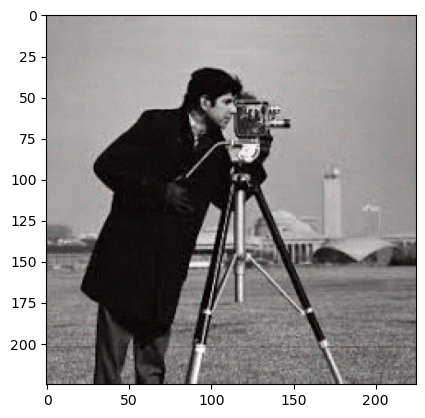

In [9]:
plt.imshow(noisy_img)

In [10]:
# Smoothing/low-pass filter kernel
kernel = np.ones((3,3),np.float32)/9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [11]:
# Smoothing/low-pass filter using filter2D command
dst = cv2.filter2D(noisy_img,-1, kernel)

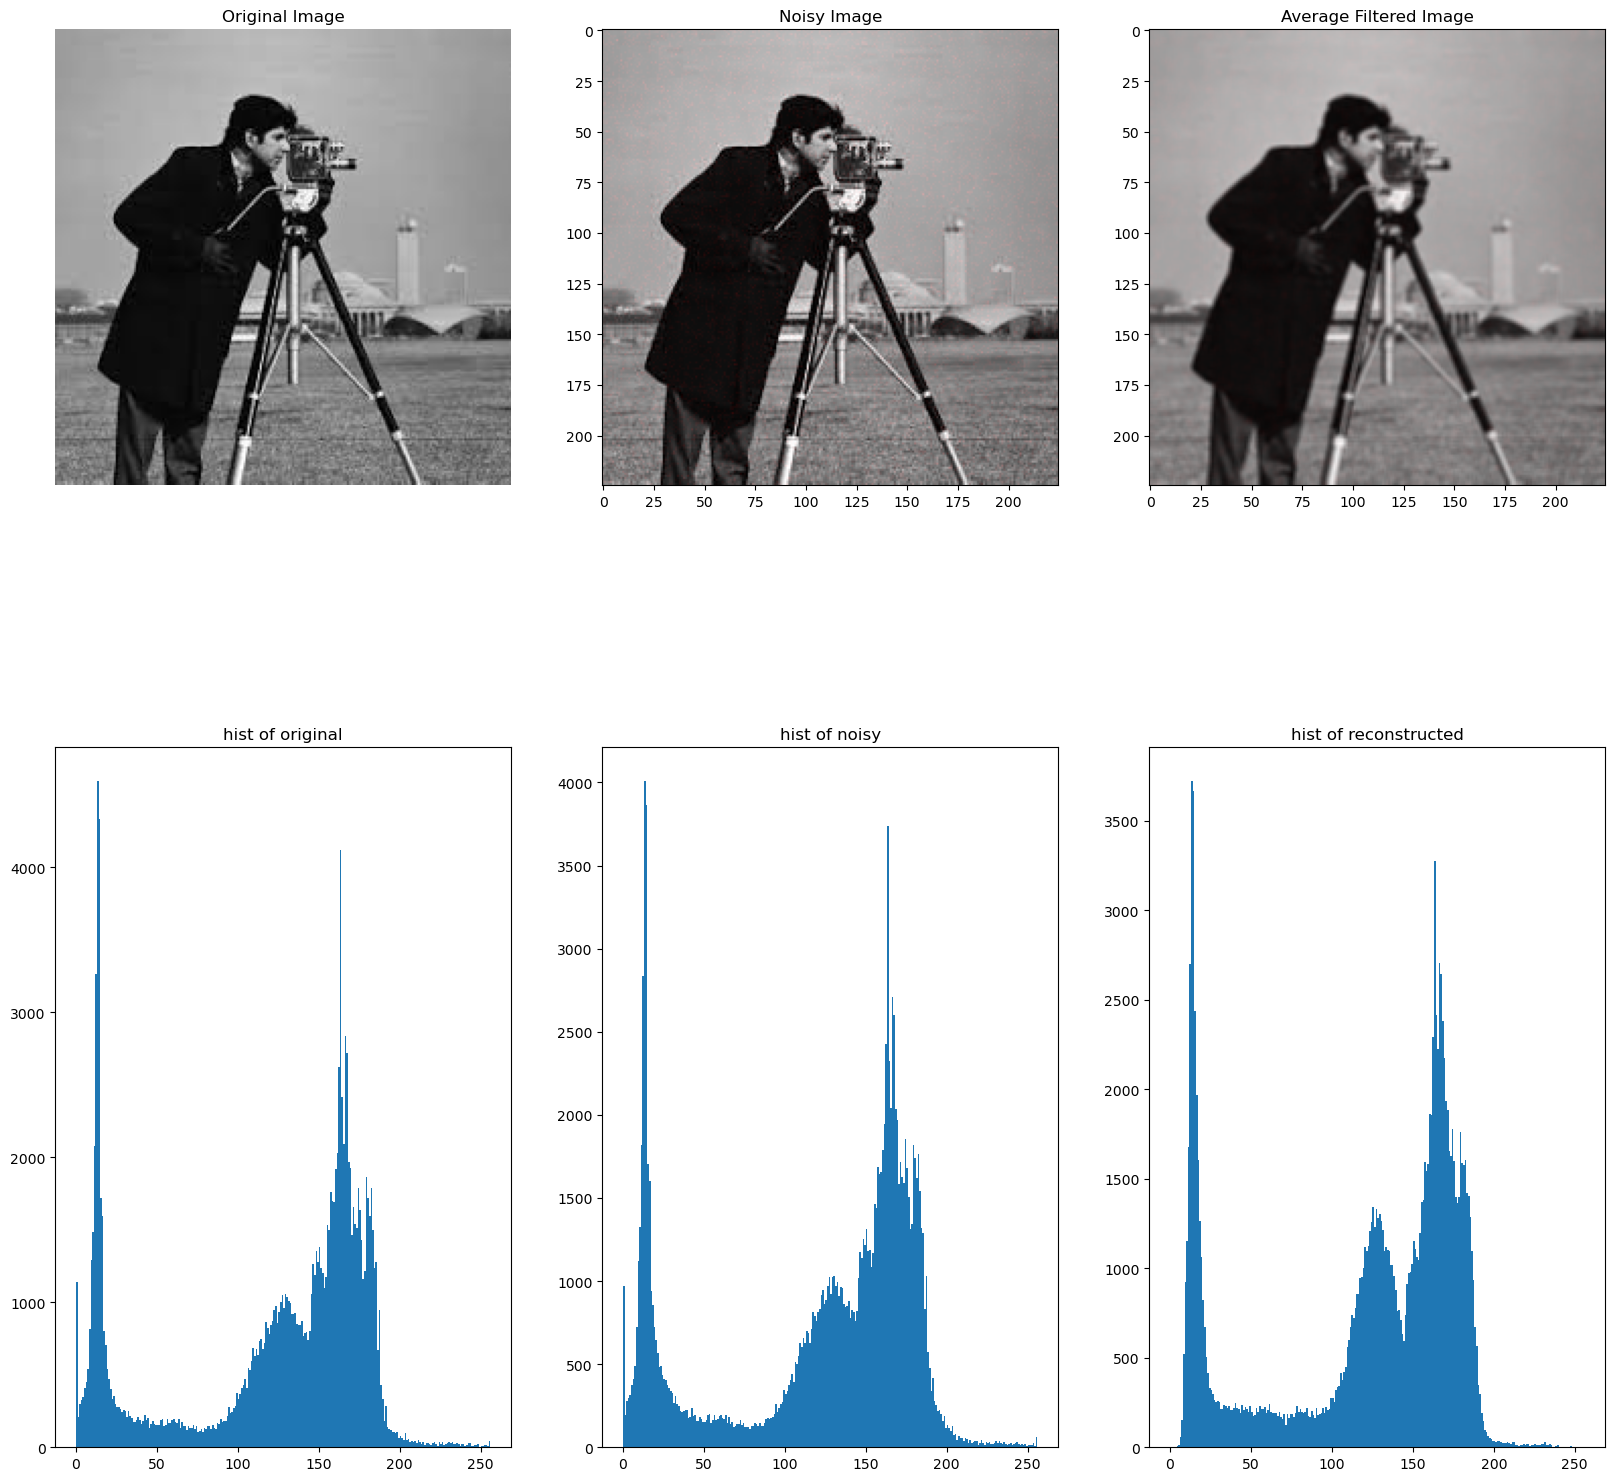

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(231), plt.imshow(img,'gray'), plt.title('Original Image'),plt.axis('off')
plt.subplot(232), plt.imshow(noisy_img,'gray'), plt.title('Noisy Image')
plt.subplot(233),plt.imshow(dst, 'gray'),plt.title('Average Filtered Image')
plt.subplot(234),plt.hist(img.ravel(),256,[0,256]),plt.title('hist of original')
plt.subplot(235),plt.hist(noisy_img.ravel(),256,[0,256]),plt.title('hist of noisy')
plt.subplot(236),plt.hist(dst.ravel(),256,[0,256]),plt.title('hist of reconstructed')
plt.show()

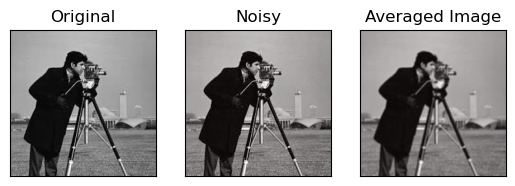

In [13]:
# blur() function for averaging filter in opencv
blur = cv2.blur(noisy_img,(3,3))
plt.subplot(131),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(noisy_img,'gray'),plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur,'gray'),plt.title('Averaged Image')
plt.xticks([]), plt.yticks([])
plt.show()

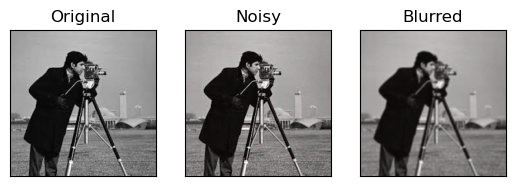

In [14]:
# GaussianBlur() function for guassian filter in opencv
blur = cv2.GaussianBlur(noisy_img,(5,5),0)
plt.subplot(131),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(noisy_img,'gray'),plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
# Adding uniform noise
uni_noise=np.zeros(img.shape,dtype=np.uint8)
cv2.randu(uni_noise,0,255)

array([[[232,   0,   0],
        [ 97,   0,   0],
        [164,   0,   0],
        ...,
        [ 70,   0,   0],
        [ 66,   0,   0],
        [ 60,   0,   0]],

       [[177,   0,   0],
        [  5,   0,   0],
        [158,   0,   0],
        ...,
        [140,   0,   0],
        [152,   0,   0],
        [224,   0,   0]],

       [[ 39,   0,   0],
        [103,   0,   0],
        [188,   0,   0],
        ...,
        [161,   0,   0],
        [224,   0,   0],
        [128,   0,   0]],

       ...,

       [[ 51,   0,   0],
        [152,   0,   0],
        [153,   0,   0],
        ...,
        [249,   0,   0],
        [240,   0,   0],
        [202,   0,   0]],

       [[  5,   0,   0],
        [123,   0,   0],
        [ 52,   0,   0],
        ...,
        [ 44,   0,   0],
        [194,   0,   0],
        [158,   0,   0]],

       [[185,   0,   0],
        [ 36,   0,   0],
        [106,   0,   0],
        ...,
        [219,   0,   0],
        [227,   0,   0],
        [ 96,   0,   0]]

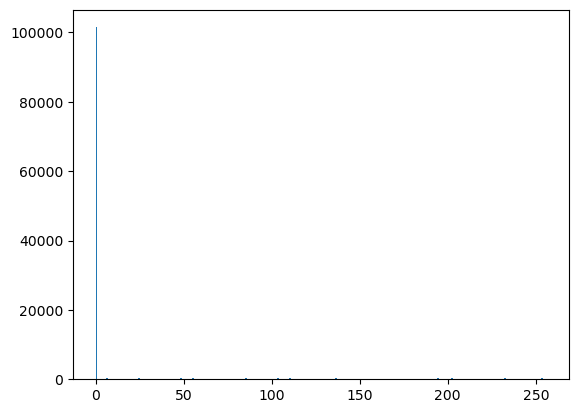

In [16]:
plt.hist(uni_noise.ravel(),256,[0,256])
plt.show()

In [17]:
# Add uniform noise to the image
un_img=cv2.add(img,uni_noise)

In [18]:
uni_filtered =cv2.GaussianBlur(un_img,(3,3),0)

Text(0.5, 1.0, 'Filtered')

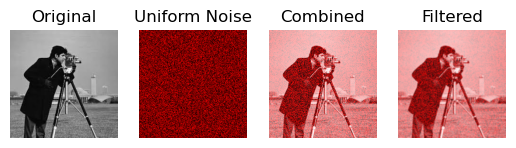

In [19]:

plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(uni_noise,cmap='gray')
plt.axis("off")
plt.title("Uniform Noise")

plt.subplot(1,4,3)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

plt.subplot(1,4,4)
plt.imshow(uni_filtered,cmap='gray')
plt.axis("off")
plt.title("Filtered")

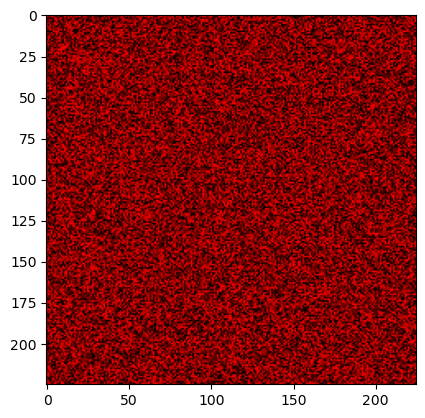

In [20]:
imp_noise=np.zeros(img.shape,dtype=np.uint8)
cv2.randu(imp_noise,0,255)
plt.imshow(imp_noise,'gray')

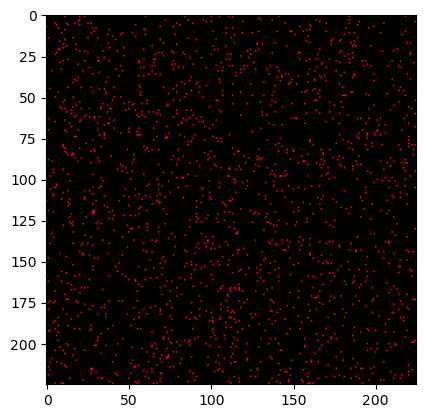

In [21]:
imp_noise=cv2.threshold(imp_noise,245,255,cv2.THRESH_BINARY)[1]
plt.imshow(imp_noise,'gray')

In [22]:
noise_img=cv2.add(img,imp_noise)

In [23]:
median = cv2.medianBlur(noise_img,5)

Text(0.5, 1.0, 'Filtered')

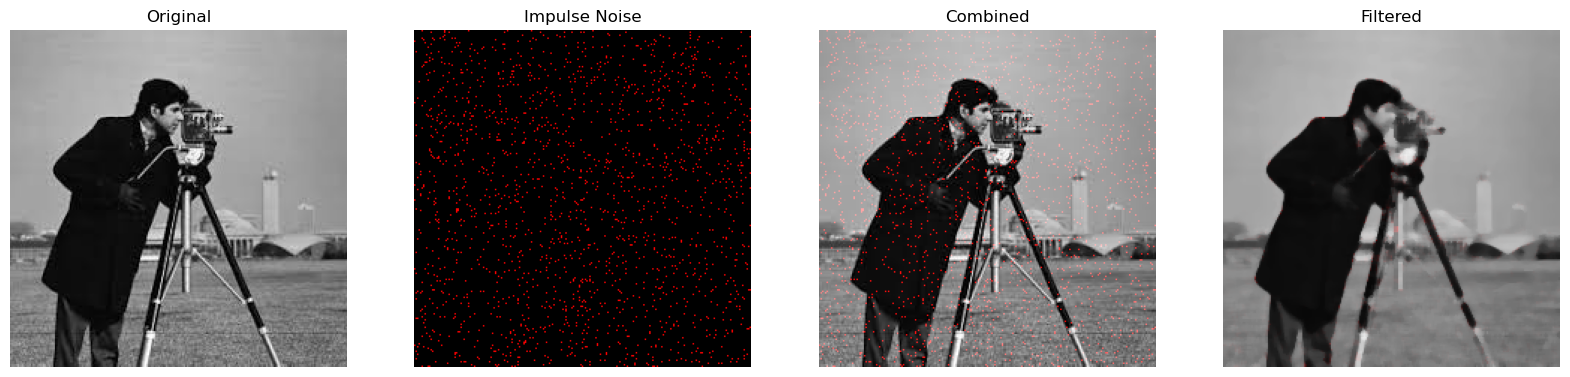

In [24]:
fig = plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(imp_noise,cmap='gray')
plt.axis("off")
plt.title("Impulse Noise")

plt.subplot(1,4,3)
plt.imshow(noise_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

plt.subplot(1,4,4)
plt.imshow(median,cmap='gray')
plt.axis("off")
plt.title("Filtered")

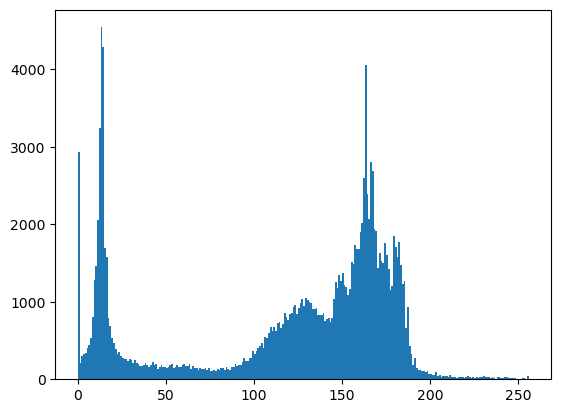

In [25]:
# Speckle noise - Multiplicative noise
noisy_img = img + img * imp_noise
plt.hist(noisy_img.ravel(),256,[0,256])
plt.show()

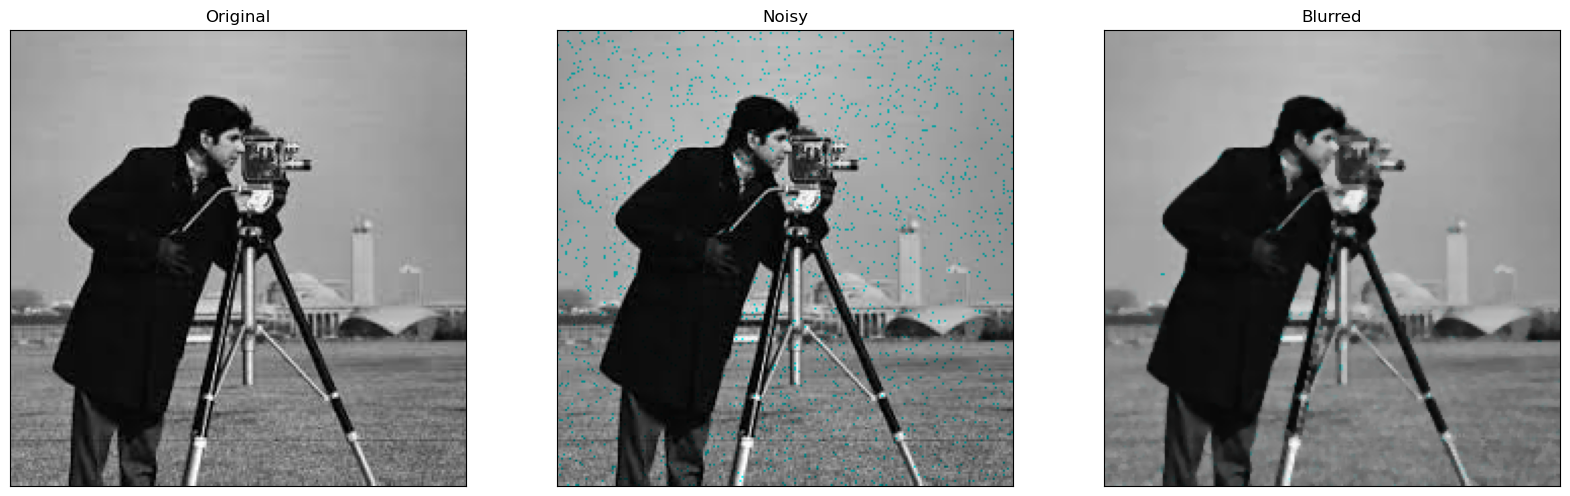

In [26]:
# GaussianBlur() function for guassian filter in opencv
blur = cv2.medianBlur(noisy_img,3)
fig = plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(noisy_img,'gray'),plt.title('Noisy')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur,'gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Sharpening filter

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('Cameraman.jpg')

In [28]:
# Smoothing/low-pass filter kernel
kernel = np.ones((3,3),np.float32)/9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

In [29]:
dst = cv2.filter2D(img,-1,kernel)

(<Axes: >, <matplotlib.image.AxesImage at 0x1ac6c631f10>)

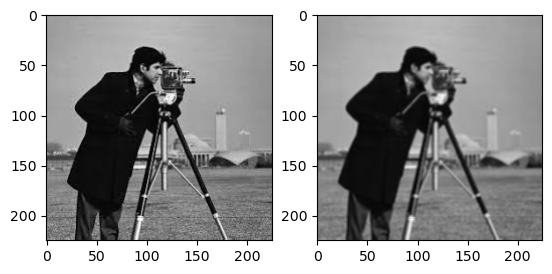

In [30]:
plt.subplot(121),plt.imshow(img,'gray')
plt.subplot(122),plt.imshow(dst,'gray')

In [31]:
#Create the sharpening kernel
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# Apply the sharpening kernel to the image using filter2D
sharpened = cv2.filter2D(dst, -1, kernel)

(<Axes: title={'center': 'Sharpened Image'}>,
 Text(0.5, 1.0, 'Sharpened Image'),
 (-0.5, 224.5, 224.5, -0.5))

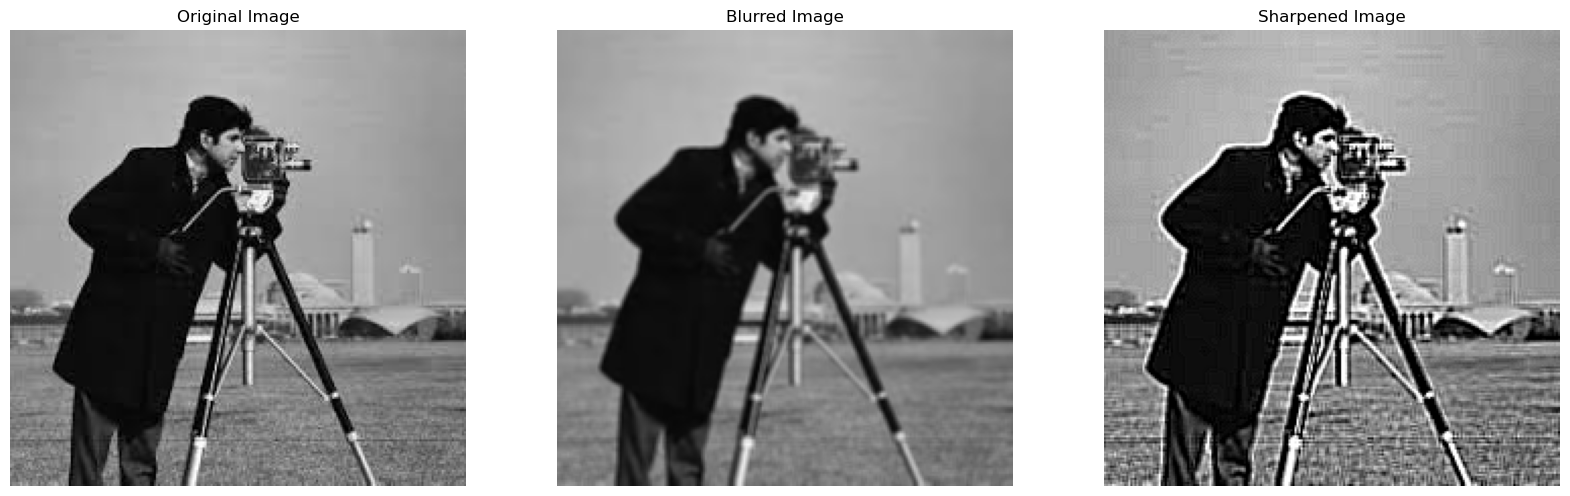

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(131), plt.imshow(img,'gray'), plt.title('Original Image'),plt.axis('off')
plt.subplot(132),plt.imshow(dst,'gray'), plt.title('Blurred Image'),plt.axis('off')
plt.subplot(133),plt.imshow(sharpened, 'gray'),plt.title('Sharpened Image'),plt.axis('off')

### Robert operator

[[ 1  0]
 [ 0 -1]] [[ 0  1]
 [-1  0]]


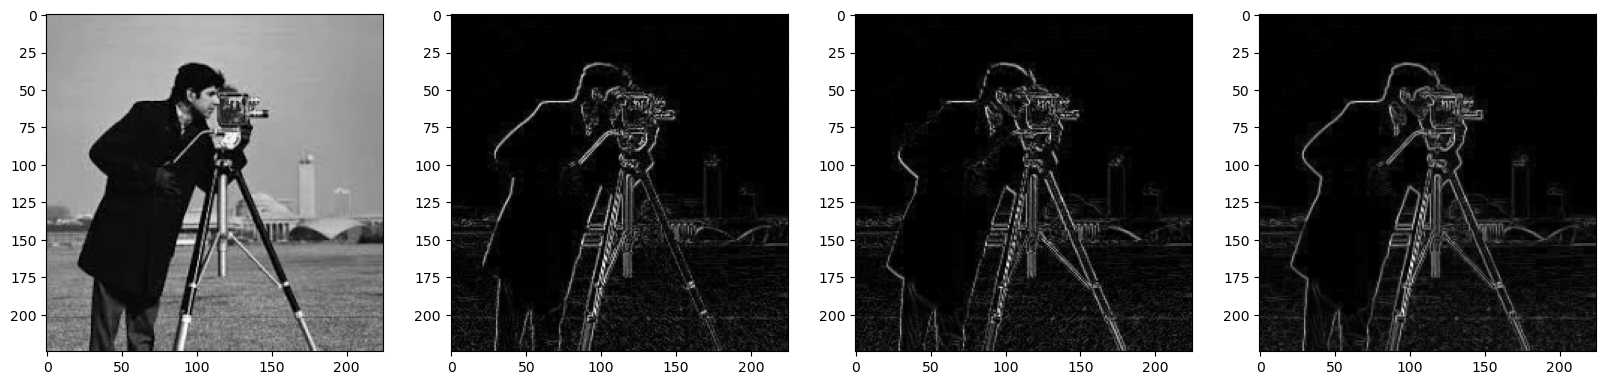

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
roberts_cross_v = np.array( [[1, 0 ],
							[0,-1 ]] )
roberts_cross_h = np.array( [[ 0, 1 ],
							[ -1, 0 ]] )
img = cv2.imread("Cameraman.jpg",0).astype('float64')
img/=255.0
vertical = cv2.filter2D(img, -1, roberts_cross_v)
horizontal = cv2.filter2D(img, -1, roberts_cross_h)
edged_img_v = np.sqrt(np.square(vertical))
edged_img_h = np.sqrt(np.square(horizontal))
edged_img = np.sqrt(np.square(vertical)+np.square(horizontal))
edged_img_v*=255
edged_img_h*=255
plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(img,'gray')

plt.subplot(142)
plt.imshow(edged_img_v,'gray')

plt.subplot(143)
plt.imshow(edged_img_h,'gray')

plt.subplot(144)
plt.imshow(edged_img,'gray')
print(roberts_cross_v,roberts_cross_h)

#### Prewitt Operator

In [35]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)
#img_prewittx = np.sqrt(np.square(img_prewittx))
#img_prewitty = np.sqrt(np.square(img_prewitty))
img_prewitt = np.sqrt(np.square(img_prewittx)+np.square(img_prewitty))

In [36]:
kernelx,kernely

(array([[ 1,  1,  1],
        [ 0,  0,  0],
        [-1, -1, -1]]),
 array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]))

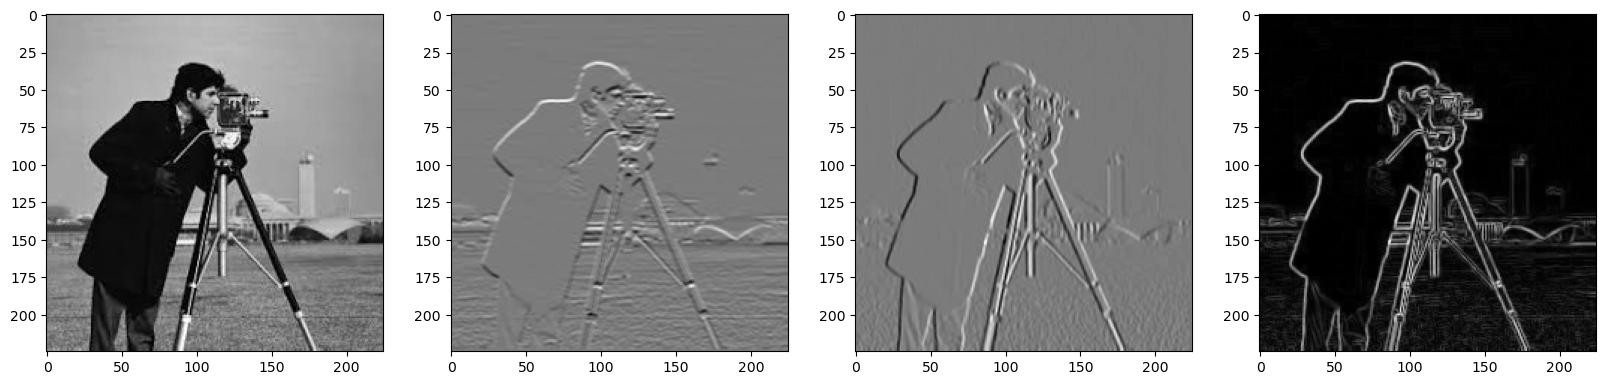

In [37]:
plt.figure(figsize=(20,20))
plt.subplot(141)
plt.imshow(img,'gray')

plt.subplot(142)
plt.imshow(img_prewittx,'gray')

plt.subplot(143)
plt.imshow(img_prewitty,'gray')

plt.subplot(144)
plt.imshow(img_prewitt,'gray')

### Sobel Operator

(<Axes: title={'center': 'sobelxy'}>,
 Text(0.5, 1.0, 'sobelxy'))

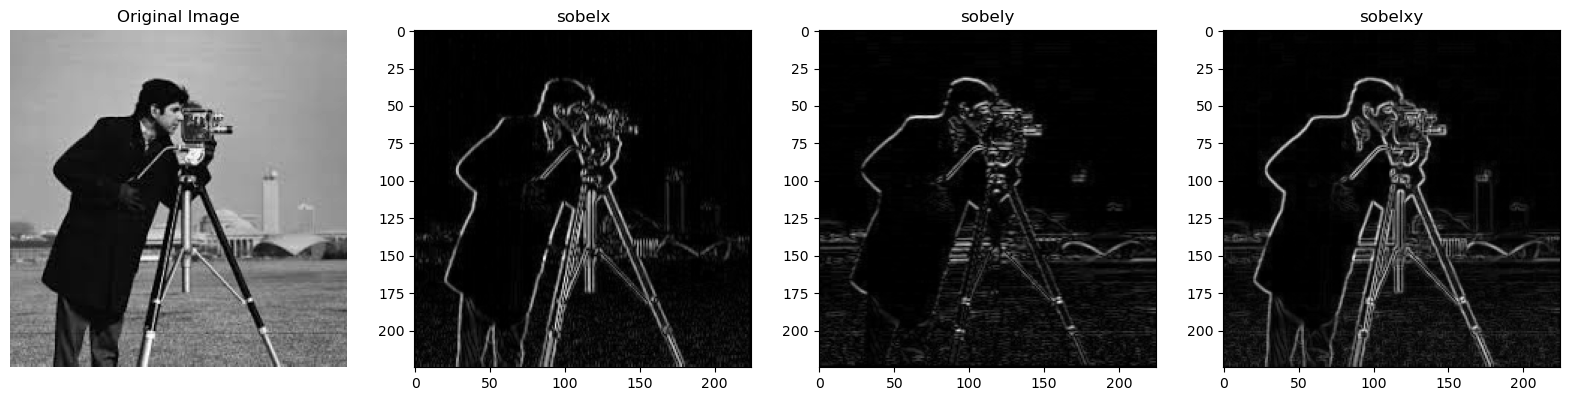

In [38]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img, ddepth=-1, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img, ddepth=-1, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img, ddepth=-1, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

sobelx = np.abs(sobelx)
sobely = np.abs(sobely)
sobelxy = np.abs(sobelx+sobely)

plt.figure(figsize=(20,20))
plt.subplot(141), plt.imshow(img,'gray'), plt.title('Original Image'),plt.axis('off')
plt.subplot(142),plt.imshow(sobelx,'gray'),plt.title('sobelx')
plt.subplot(143),plt.imshow(sobely,'gray'),plt.title('sobely')
plt.subplot(144),plt.imshow(sobelxy,'gray'),plt.title('sobelxy')

In [39]:
sobelxy

array([[0.        , 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.        ],
       [0.        , 0.01568627, 0.01568627, ..., 0.03137255, 0.03137255,
        0.01568627],
       [0.        , 0.01568627, 0.01568627, ..., 0.04705882, 0.04705882,
        0.03137255],
       ...,
       [0.21176471, 0.32156863, 0.60392157, ..., 0.51764706, 0.32941176,
        0.0627451 ],
       [0.16470588, 0.47843137, 0.61176471, ..., 0.30588235, 0.48627451,
        0.21960784],
       [0.        , 0.31372549, 0.1254902 , ..., 0.07058824, 0.25098039,
        0.        ]])

In [40]:
sobelxy

array([[0.        , 0.01568627, 0.01568627, ..., 0.01568627, 0.01568627,
        0.        ],
       [0.        , 0.01568627, 0.01568627, ..., 0.03137255, 0.03137255,
        0.01568627],
       [0.        , 0.01568627, 0.01568627, ..., 0.04705882, 0.04705882,
        0.03137255],
       ...,
       [0.21176471, 0.32156863, 0.60392157, ..., 0.51764706, 0.32941176,
        0.0627451 ],
       [0.16470588, 0.47843137, 0.61176471, ..., 0.30588235, 0.48627451,
        0.21960784],
       [0.        , 0.31372549, 0.1254902 , ..., 0.07058824, 0.25098039,
        0.        ]])